In [39]:
import pandas as pd
employee_data = pd.read_csv('HR.csv')

In [40]:
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
employee_data.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [42]:
employee_data.rename(columns = {'sales' : 'department'},inplace=True)
employee_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [43]:
employee_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [44]:
employee_data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [45]:
import numpy as np
employee_data.department = np.where(employee_data.department == 'support' , 'technical', employee_data.department)
employee_data.department = np.where(employee_data.department == 'IT' , 'technical', employee_data.department)


In [46]:
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [47]:
cat_vars=['department','salary']
for var in cat_vars:
#     cat_list='var'+'_'+var
    cat_list = pd.get_dummies(employee_data[var], prefix=var)
    hr1=employee_data.join(cat_list)
    employee_data=hr1

In [48]:
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


In [49]:
employee_data.drop(employee_data.columns[[8,9]], axis =1, inplace =True)
employee_data.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [50]:
employee_var= employee_data.columns.values.tolist()
employee_var

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [51]:
y = ['left']
x = [i for i in employee_var if i not in y]

In [52]:
x

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [53]:
from sklearn.feature_selection import RFE
from  sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

In [54]:
rfe = RFE(lr,  n_features_to_select=10)

In [55]:
rfe = rfe.fit(employee_data[x], employee_data[y])

C:\Users\mummy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mummy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mummy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

In [56]:
print(rfe.support_)

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]


In [57]:
print(rfe.ranking_)

[1 1 3 8 1 1 1 1 7 1 1 6 4 5 9 1 1 2]


In [58]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 

In [59]:
x = employee_data[cols]

In [60]:
y = employee_data['left']

In [61]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle=True,test_size = 0.28, random_state=0)

In [62]:
lrmodel = LogisticRegression()
lrmodel.fit(x_train, y_train)

LogisticRegression()

In [63]:
lrmodel.score(x_test,y_test)

0.7697619047619048

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)

In [65]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [66]:
rf.score(x_test,y_test)

0.9788095238095238

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
y_pred = rf.predict(x_test)
forest_cm = confusion_matrix(y_pred, y_test)


Text(0.5, 1.0, 'Random Forest')

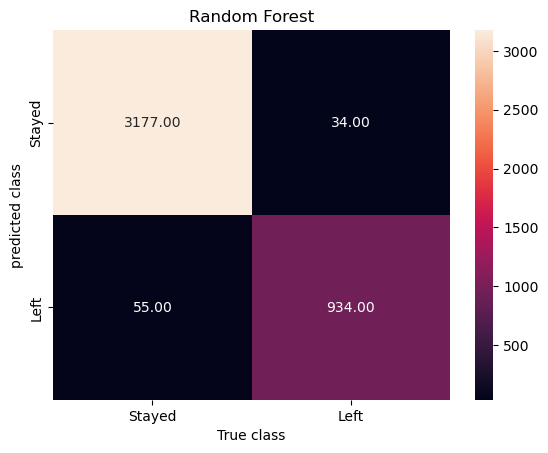

In [68]:
sns.heatmap(forest_cm, annot = True, fmt = '.2f', xticklabels = [ "Stayed", "Left"] ,  yticklabels = [ "Stayed", "Left"] )
import  matplotlib.pyplot as plt
plt.ylabel('predicted class')
plt.xlabel('True class')
plt.title('Random Forest')

In [69]:
from sklearn.metrics import roc_auc_score, roc_curve

In [70]:
logis_roC_auc = roc_auc_score(y_test, lrmodel.predict(x_test))

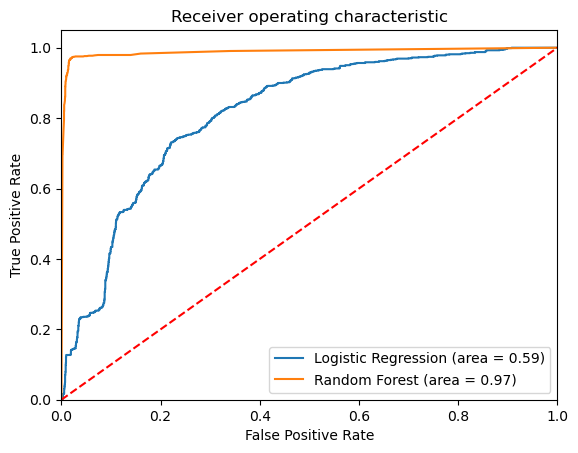

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, lrmodel.predict_proba(x_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logis_roC_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [72]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.22%
department_hr-0.26%
promotion_last_5years-0.27%
department_RandD-0.30%
salary_high-0.69%
salary_low-1.16%
Work_accident-1.46%
last_evaluation-18.43%
time_spend_company-26.67%
satisfaction_level-50.52%


In [74]:
rf.predict([[0.80, 0.86, 6,0,0,0,0,0,0,0]])

C:\Users\mummy\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)